In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[10.01145764]
 [19.5495245 ]]
[[20.32489   ]
 [ 9.68799575]]


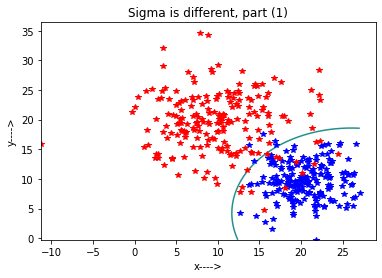

<Figure size 432x288 with 0 Axes>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# extracting the data

part = 1 # alloting 1 for part 1 and 2 for part 2

if part == 1:
    data = np.loadtxt("./binclass.txt",delimiter=',')
else :
    data = np.loadtxt("./binclassv2.txt",delimiter=',')
#print(data)
simil_in_sigma = 1 # alloting 1 for same sigma and 0 for diff sigma
#learning features and labels from data 
feat = data[:, :data.shape[1]-1]
lab = data[:, data.shape[1]-1]
#print (lab.shape)
#classes of positive and negative labels
negi = lab<0
#print(negi)
posi = lab>0
#calculating means and std dev and variances for negative class 
stddev_n = np.std(feat[negi], axis = 0)
mean_n = np.mean(feat[negi], axis = 0)
var_n = np.mean(stddev_n*stddev_n)
#print(n_mean.shape)
#print(var_n)
#calculating means and std dev and variances for positive class 
stddev_p = np.std(feat[posi], axis = 0)
mean_p = np.mean(feat[posi], axis = 0)
var_p = np.mean(stddev_p*stddev_p)
#print(var_p)
var = np.array([var_p, var_n])
mean = np.array([mean_p, mean_n])
#print(var)
#print(mean)

mean_i = mean_p.reshape(mean_p.shape[0], 1)

print(mean_i)
mean_j = mean_n.reshape(mean_n.shape[0], 1)
print(mean_j)
#setting up te plot
if simil_in_sigma == 0: # deciding plot titles by sigma
    plt.title('Sigma is same, part (' + str(part) + ')')
    n_var = p_var
else:
    plt.title('Sigma is different, part (' + str(part) + ')')
#plotting the classes blue and red 
plt.plot(feat[negi,0], feat[negi,1], 'b*')
plt.plot(feat[posi,0], feat[posi,1], 'r*')
x_0 = np.arange(np.min(feat[:,0]),np.max(feat[:,0]),0.05)
plt.xlabel('x---->')
y_0 = np.arange(np.min(feat[:,1]),np.max(feat[:,1]),0.05)
plt.ylabel('y---->')
X, Y = np.meshgrid(x_0, y_0)
Z1 = (pow(var_p, (-1*mean_i.shape[0]/2)))*np.exp((pow((X-mean_i[0]), 2) + pow((Y-mean_i[1]), 2))/(-2*var_p))
Z2 = (pow(var_n, (-1*mean_j.shape[0]/2)))*np.exp((pow((X-mean_j[0]), 2) + pow((Y-mean_j[1]), 2))/(-2*var_n))
Z = Z1 - Z2
plt.contour(X, Y, Z, 0)
plt.show()
plt.savefig('part_1_same_sigma.png')
